In [1]:
from impfuncs import *
import matplotlib.pyplot as plt
from matplotlib import rc
state="India"
start_day=35

end_day=83


dfs=populate_dfs()    

In [2]:
color=next(colorcycler)
arr=load_Data(dfs,state=state,day_max=end_day)
cases=column(arr,2)
recovery=column(arr,3)
dead=column(arr,4)
active=column(arr,5)
cases_diff=np.diff(cases)
recovery_diff=np.diff(recovery)
dead_diff=np.diff(dead)
active_diff=np.diff(active)

cases_ddays=[get_doubling_s(cases_diff[i-1]/cases[i-1]) for i in range(start_day,end_day)]
recovery_ddays=[get_doubling_s(recovery_diff[i-1]/recovery[i-1]) for i in range(start_day,end_day)]
dead_ddays=[get_doubling_s(dead_diff[i-1]/dead[i-1]) for i in range(start_day,end_day)]
active_ddays=[get_doubling_s(active_diff[i-1]/active[i-1]) for i in range(start_day,end_day)]

cases_rate=[cases_diff[i-1]*100/cases[i-1] for i in range(start_day,end_day)]
recovery_rate=[recovery_diff[i-1]*100/recovery[i-1] for i in range(start_day,end_day)]
dead_rate=[dead_diff[i-1]*100/dead[i-1] for i in range(start_day,end_day)]
active_rate=[active_diff[i-1]*100/active[i-1] for i in range(start_day,end_day)]
x=column(arr,1)[range(start_day,end_day)]    
y_dead=dead[range(start_day,end_day)]
y_dead_diff=dead_diff[range(start_day-1,end_day-1)]
y_dead_ddays=dead_ddays
y_dead_rate=dead_rate
y_active=active[range(start_day,end_day)]
y_active_diff=active_diff[range(start_day-1,end_day-1)]
y_active_ddays=active_ddays
y_active_rate=active_rate
y_cases=cases[range(start_day,end_day)]
y_cases_diff=cases_diff[range(start_day-1,end_day-1)]
y_cases_ddays=cases_ddays
y_cases_rate=cases_rate
y_recovery=recovery[range(start_day,end_day)]
y_recovery_diff=recovery_diff[range(start_day-1,end_day-1)]
y_recovery_ddays=recovery_ddays
y_recovery_rate=recovery_rate


/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:94: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_cases=df2_cases[df["Date"]>=start_date]
/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_recovered=df2_recovered[df["Date"]>=start_date]
/private/var/mobile/Containers/Shared/AppGroup/8D8E6A4E-6B31-4B79-BEF3-5994929C193E/File Provider Storage/Repositories/covid_India/impfuncs.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_dead=df2_dead[df["Date"]>=start_date]


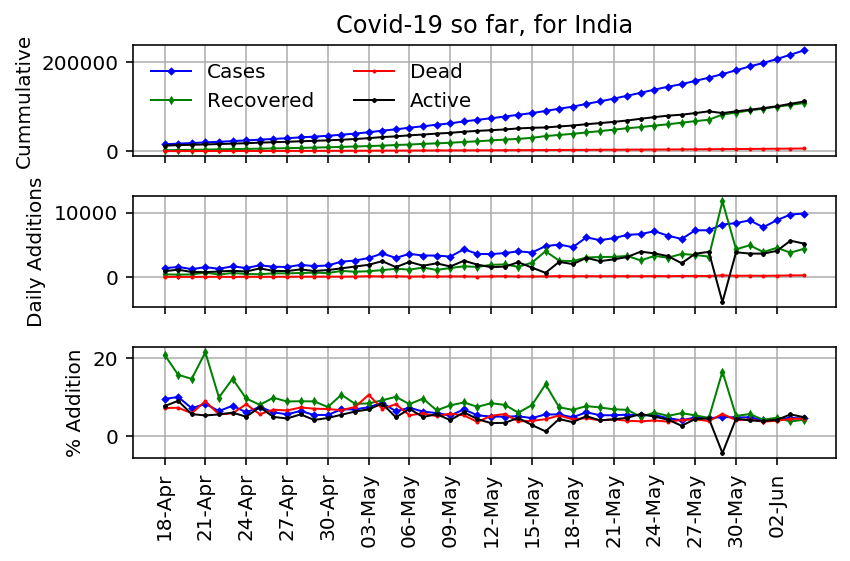

In [3]:
fig, (ax_con,ax_daily,ax_percent) = plt.subplots(3,1,sharex=True)
rc('font', weight='bold')
ms=2
lw=1
ls="-"
ax_con.plot(x,y_cases,label="Cases",color="blue",lw=lw,linestyle=ls,marker="D",markersize=ms)
ax_con.plot(x,y_recovery,label="Recovered",color="green",lw=lw,linestyle=ls,marker="d",markersize=ms)
ax_con.plot(x,y_dead,label="Dead",color="red",lw=lw,linestyle=ls,marker=".",markersize=ms)
ax_con.plot(x,y_active,label="Active",color="black",lw=lw,linestyle=ls,marker="*",markersize=ms)

ax_daily.plot(x,y_cases_diff,label="Cases",color="blue",lw=lw,linestyle=ls,marker="D",markersize=ms)
ax_daily.plot(x,y_recovery_diff,label="Recovered",color="green",lw=lw,linestyle=ls,marker="d",markersize=ms)
ax_daily.plot(x,y_dead_diff,label="Deaths",color="red",lw=lw,linestyle=ls,marker=".",markersize=ms)
ax_daily.plot(x,y_active_diff,label="Active",color= "black",lw=lw,linestyle=ls,marker="*",markersize=ms)

#ax_doubling.plot(x,y_cases_ddays,label="cases doubling days",color="blue")
#ax_doubling.plot(x,y_recovery_ddays,label="Recovered doubling days",color="green")
#ax_doubling.plot(x,y_dead_ddays,label="Dead doubling days", color="red")
#ax_doubling.plot(x,y_active_ddays,label="Active doubling days",color="black")

ax_percent.plot(x,y_cases_rate,label="Cases",color="blue",lw=lw,linestyle=ls,marker="D",markersize=ms)
ax_percent.plot(x,y_recovery_rate,label="Recovery",color="green",lw=lw,linestyle=ls,marker="d",markersize=ms)
ax_percent.plot(x,y_dead_rate,label="Death",color="red",lw=lw,linestyle=ls,marker=".",markersize=ms)
ax_percent.plot(x,y_active_rate,label="Active",color="black",lw=lw,linestyle=ls,marker="*",markersize=ms)

plt.xticks(range(0,len(x),3),rotation=90)

ax_con.grid()
ax_daily.grid()
ax_percent.grid()
ax_con.set_ylabel("Cummulative")
ax_daily.set_ylabel("Daily Additions")
ax_percent.set_ylabel("% Addition")
legend_properties = {'weight':'normal'}
ax_con.legend(prop=legend_properties,frameon=False,ncol=2)
ax_con.set_title("Covid-19 so far, for "+str(state))
plt.tight_layout()
plt.savefig("guru.png",dpi=600)
plt.show()


In [ ]:
plt.show()